# Efficiently start any Machine Learning image classification project with organized trackable datasets -- Hub2.0 !

## Imports

In [ ]:
!pip install hub==2.0.7

In [ ]:
import hub
import matplotlib.pyplot as plt
import glob 
import random
from PIL import Image
import os
from tqdm import tqdm
import numpy as np


In [ ]:
print(hub.__version__)

2.0.7


## Load Data from Kaggle

In [ ]:
!export KAGGLE_USERNAME="xxxxxx" && export KAGGLE_KEY="xxxxxxxx" && mkdir -p data && cd data && kaggle datasets download -d alexattia/the-simpsons-characters-dataset && unzip -n the-simpsons-characters-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1270.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pi

In [ ]:
!ls './data/simpsons_dataset' # the dataset from Kaggle is duplicated in the directory  

abraham_grampa_simpson	  homer_simpson        otto_mann
agnes_skinner		  kent_brockman        patty_bouvier
apu_nahasapeemapetilon	  krusty_the_clown     principal_skinner
barney_gumble		  lenny_leonard        professor_john_frink
bart_simpson		  lionel_hutz	       rainier_wolfcastle
carl_carlson		  lisa_simpson	       ralph_wiggum
charles_montgomery_burns  maggie_simpson       selma_bouvier
chief_wiggum		  marge_simpson        sideshow_bob
cletus_spuckler		  martin_prince        sideshow_mel
comic_book_guy		  mayor_quimby	       simpsons_dataset
disco_stu		  milhouse_van_houten  snake_jailbird
edna_krabappel		  miss_hoover	       troy_mcclure
fat_tony		  moe_szyslak	       waylon_smithers
gil			  ned_flanders
groundskeeper_willie	  nelson_muntz


We see that there is a duplicated simpsons_dataset subfolder in this folder, so let's delete this 

In [ ]:
!rm -r ./data/simpsons_dataset/simpsons_dataset

In [ ]:
!ls ./data/simpsons_dataset # the dataset from Kaggle is duplicated in the directory  

abraham_grampa_simpson	  groundskeeper_willie	ned_flanders
agnes_skinner		  homer_simpson		nelson_muntz
apu_nahasapeemapetilon	  kent_brockman		otto_mann
barney_gumble		  krusty_the_clown	patty_bouvier
bart_simpson		  lenny_leonard		principal_skinner
carl_carlson		  lionel_hutz		professor_john_frink
charles_montgomery_burns  lisa_simpson		rainier_wolfcastle
chief_wiggum		  maggie_simpson	ralph_wiggum
cletus_spuckler		  marge_simpson		selma_bouvier
comic_book_guy		  martin_prince		sideshow_bob
disco_stu		  mayor_quimby		sideshow_mel
edna_krabappel		  milhouse_van_houten	snake_jailbird
fat_tony		  miss_hoover		troy_mcclure
gil			  moe_szyslak		waylon_smithers


Now that the dataset looks good, we can visualize some images

In [ ]:
path_dataset = './data/simpsons_dataset'

# Looking for all files with the extension ".jpg" in the subfolders (/**/) of the dataset 
list_all_files_in_dataset = glob.glob(path_dataset + '/**/*.jpg')
print(f'There are {len(list_all_files_in_dataset)} in the Simpsons dataset')

There are 20933 in the Simpsons dataset


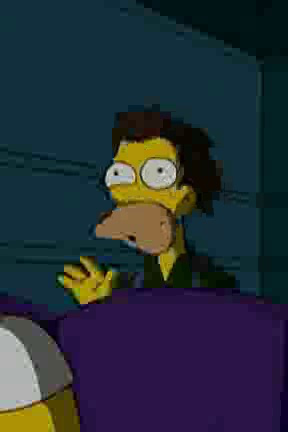

In [ ]:
# Visualize first image in the list
Image.open(list_all_files_in_dataset[0]).show()

In [ ]:
# How many classes do we have in this dataset?
characters_classes = []

# Creates a generator 
characters_classes_gen = glob.iglob(path_dataset + "/**")
for class_name in characters_classes_gen:
  # append the name of the character and remove the root path: path_dataset
  characters_classes.append(class_name.replace(path_dataset + '/', ''))
  
print(f'There are {len(characters_classes)} characters classes in the dataset: {characters_classes}')

There are 42 characters classes in the dataset: ['lenny_leonard', 'bart_simpson', 'disco_stu', 'barney_gumble', 'milhouse_van_houten', 'marge_simpson', 'ned_flanders', 'lionel_hutz', 'sideshow_mel', 'fat_tony', 'troy_mcclure', 'comic_book_guy', 'apu_nahasapeemapetilon', 'agnes_skinner', 'rainier_wolfcastle', 'kent_brockman', 'ralph_wiggum', 'miss_hoover', 'edna_krabappel', 'krusty_the_clown', 'homer_simpson', 'abraham_grampa_simpson', 'waylon_smithers', 'martin_prince', 'nelson_muntz', 'chief_wiggum', 'charles_montgomery_burns', 'carl_carlson', 'snake_jailbird', 'principal_skinner', 'maggie_simpson', 'gil', 'sideshow_bob', 'professor_john_frink', 'otto_mann', 'lisa_simpson', 'patty_bouvier', 'moe_szyslak', 'cletus_spuckler', 'selma_bouvier', 'groundskeeper_willie', 'mayor_quimby']


## Send dataset to Hub

In [ ]:
!activeloop login -u username -p password

Successfully logged in to Activeloop.


In [ ]:
hub_dataset_path = 'hub://margauxmforsythe/the-simpsons-characters-dataset'

In [ ]:
# send_dataset_to_Hub
#
# Find the classes in the dataset 'path_dataset' (dataset needs to be organized in subfolders
# that correspond to the classes of the images in each subfolders)
# Then sends the dataset to Hub to the path 'hub_dataset_path' and organizes 
# all the images with their labels
#
# Inputs:
# path_dataset: path to the local dataset folder 
# hub_dataset_path: path defined by user (eg: 'hub://username/my-dataset')
def send_dataset_to_Hub(path_dataset, hub_dataset_path):
  # Find the characters_classes and list of files that need to be uploaded
  characters_classes = os.listdir(path_dataset)

  files_list = []
  for dirpath, dirnames, filenames in os.walk(path_dataset):
      for filename in filenames:
          files_list.append(os.path.join(dirpath, filename))
  print(f'The classes in this dataset are: {characters_classes}')
 
  # Send to Hub
  with hub.empty(hub_dataset_path) as ds:
    # Create the tensors with names of your choice.
    ds.create_tensor('images', htype = 'image', sample_compression = 'jpg')
    ds.create_tensor('labels', htype = 'class_label', class_names = characters_classes)

    # Add arbitrary metadata - Optional
    ds.info.update(description = 'The Simpsons Characters dataset')
    ds.images.info.update(camera_type = 'SLR')
    
    # Iterate through the files and append to hub dataset
    for file in tqdm(files_list):
        label_text = os.path.basename(os.path.dirname(file))
        label_num = characters_classes.index(label_text)
        
        ds.images.append(hub.read(file))  # Append to images tensor using hub.read
        ds.labels.append(np.uint32(label_num)) # Append to labels tensor

    return ds, characters_classes
                

In [ ]:
ds, characters_classes = send_dataset_to_Hub(path_dataset, hub_dataset_path)

The classes in this dataset are: ['lenny_leonard', 'bart_simpson', 'disco_stu', 'barney_gumble', 'milhouse_van_houten', 'marge_simpson', 'ned_flanders', 'lionel_hutz', 'sideshow_mel', 'fat_tony', 'troy_mcclure', 'comic_book_guy', 'apu_nahasapeemapetilon', 'agnes_skinner', 'rainier_wolfcastle', 'kent_brockman', 'ralph_wiggum', 'miss_hoover', 'edna_krabappel', 'krusty_the_clown', 'homer_simpson', 'abraham_grampa_simpson', 'waylon_smithers', 'martin_prince', 'nelson_muntz', 'chief_wiggum', 'charles_montgomery_burns', 'carl_carlson', 'snake_jailbird', 'principal_skinner', 'maggie_simpson', 'gil', 'sideshow_bob', 'professor_john_frink', 'otto_mann', 'lisa_simpson', 'patty_bouvier', 'moe_szyslak', 'cletus_spuckler', 'selma_bouvier', 'groundskeeper_willie', 'mayor_quimby']


100%|██████████| 20933/20933 [02:25<00:00, 144.08it/s]


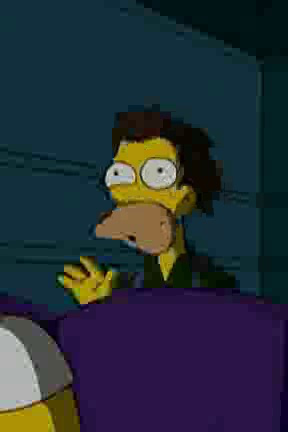

In [ ]:
Image.fromarray(ds.images[0].numpy())

In [ ]:
# Checking that we have all of the images in ds
len(ds)

20933

Image:


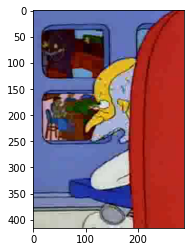

Label: "charles_montgomery_burns"
Image:


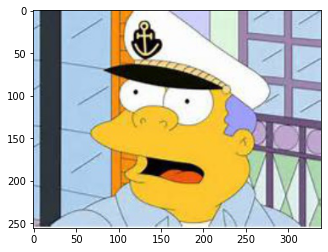

Label: "chief_wiggum"
Image:


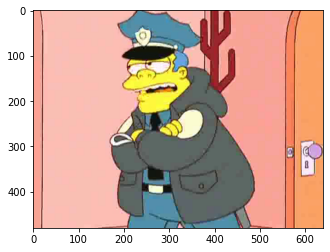

Label: "chief_wiggum"
Image:


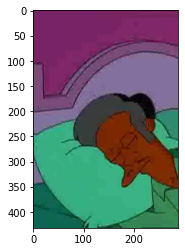

Label: "apu_nahasapeemapetilon"
Image:


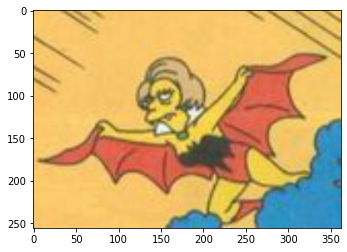

Label: "edna_krabappel"
Image:


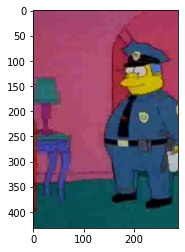

Label: "chief_wiggum"


In [ ]:
def show_image_in_ds(ds, idx=1):
    image = ds.images[idx].numpy()
    label = ds.labels[idx].numpy(aslist=True)[0]
    print("Image:")
    plt.imshow(image)
    plt.show()
    print("Label: \"%s\"" % (characters_classes[label]))
    

num_images_to_display = 6
for id in range(0,num_images_to_display):
    show_image_in_ds(ds, random.randint(0, len(ds)))

## Resize Images, create a new Dataset and send to Hub 

In [ ]:
@hub.compute
def resize(sample_in, sample_out, new_size):
    ## First two arguments are always default arguments containing:
    #     1st argument is an element of the input iterable 
    #     (list, dataset, array,...)
    #     2nd argument is a dataset sample
    ## Third argument is the required size for the output images
    
    # Append the label and image to the output sample
    sample_out.labels.append(sample_in.labels.numpy())
    sample_out.images.append(np.array(Image.fromarray(sample_in.images.numpy()).resize(new_size)))
    
    return sample_out

In [ ]:
# Load dataset from Hub
ds_simpsons_hub = hub.load(hub_dataset_path)

# Hub path of new resized dataset -- this could be any path format (local, s3, etc)
hub_dataset_path_resized = 'hub://margauxmforsythe/the-simpsons-characters-dataset-resized-224x224'

#We use the overwrite=True to make this code re-runnable
ds_simpsons_resized = hub.like(hub_dataset_path_resized, ds_simpsons_hub, overwrite = True)

In [ ]:
resize(new_size=(224, 224)).eval(ds_simpsons_hub, ds_simpsons_resized, num_workers = 2)

(432, 288, 3)


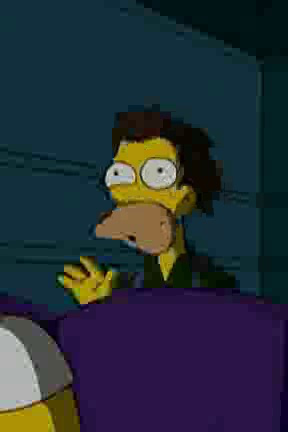

In [ ]:
# Original image
print(ds_simpsons_hub.images[0].numpy().shape)
Image.fromarray(ds_simpsons_hub.images[0].numpy())

(224, 224, 3)


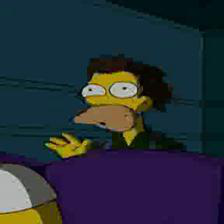

In [ ]:
# Resize image
print(ds_simpsons_resized.images[0].numpy().shape)
Image.fromarray(ds_simpsons_resized.images[0].numpy())

## Load data from Hub

In [ ]:
ds_simpsons_resized_hub = hub.load(hub_dataset_path_resized)

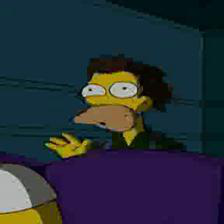

In [ ]:
Image.fromarray(ds_simpsons_resized_hub.images[0].numpy())


Image:


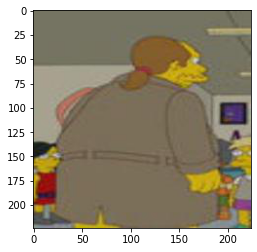

Label: "comic_book_guy"
Image:


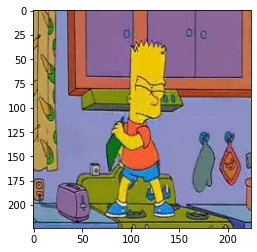

Label: "bart_simpson"
Image:


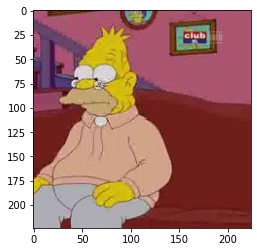

Label: "abraham_grampa_simpson"
Image:


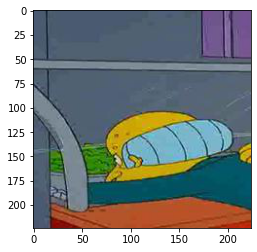

Label: "charles_montgomery_burns"
Image:


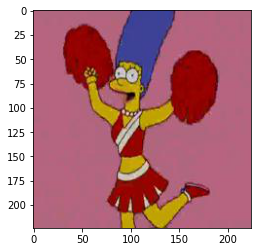

Label: "marge_simpson"
Image:


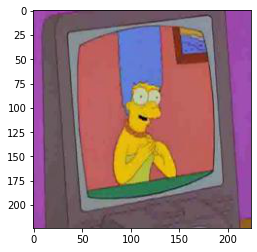

Label: "marge_simpson"


In [ ]:
# visualize
num_images_to_display = 6
for id in range(0,num_images_to_display):
    show_image_in_ds(ds_simpsons_resized_hub, random.randint(0, len(ds)))

## Simpsons Family: we want to create a dataset with only the characters from the main Simpsons family

In [ ]:
!ls data/simpsons_dataset/

abraham_grampa_simpson	  groundskeeper_willie	ned_flanders
agnes_skinner		  homer_simpson		nelson_muntz
apu_nahasapeemapetilon	  kent_brockman		otto_mann
barney_gumble		  krusty_the_clown	patty_bouvier
bart_simpson		  lenny_leonard		principal_skinner
carl_carlson		  lionel_hutz		professor_john_frink
charles_montgomery_burns  lisa_simpson		rainier_wolfcastle
chief_wiggum		  maggie_simpson	ralph_wiggum
cletus_spuckler		  marge_simpson		selma_bouvier
comic_book_guy		  martin_prince		sideshow_bob
disco_stu		  mayor_quimby		sideshow_mel
edna_krabappel		  milhouse_van_houten	snake_jailbird
fat_tony		  miss_hoover		troy_mcclure
gil			  moe_szyslak		waylon_smithers


In [ ]:
# Creates a generator 
subfolders_dataset_gen = glob.iglob(path_dataset + "/**")

for subfolder in subfolders_dataset_gen:
  # print(subfolder)
  # append the name of the character and remove the root path: path_dataset
  if 'lisa' in subfolder or 'homer' in subfolder or 'maggie' in subfolder or 'marge' in subfolder or 'bart' in subfolder:
    print(f'Keeping this subfolder: {subfolder}')
  else:
    os.system(f'rm -r {subfolder}')
    print(f'Deleted subfolder {subfolder}')

Deleted subfolder ./data/simpsons_dataset/lenny_leonard
Keeping this subfolder: ./data/simpsons_dataset/bart_simpson
Deleted subfolder ./data/simpsons_dataset/disco_stu
Deleted subfolder ./data/simpsons_dataset/barney_gumble
Deleted subfolder ./data/simpsons_dataset/milhouse_van_houten
Keeping this subfolder: ./data/simpsons_dataset/marge_simpson
Deleted subfolder ./data/simpsons_dataset/ned_flanders
Deleted subfolder ./data/simpsons_dataset/lionel_hutz
Deleted subfolder ./data/simpsons_dataset/sideshow_mel
Deleted subfolder ./data/simpsons_dataset/fat_tony
Deleted subfolder ./data/simpsons_dataset/troy_mcclure
Deleted subfolder ./data/simpsons_dataset/comic_book_guy
Deleted subfolder ./data/simpsons_dataset/apu_nahasapeemapetilon
Deleted subfolder ./data/simpsons_dataset/agnes_skinner
Deleted subfolder ./data/simpsons_dataset/rainier_wolfcastle
Deleted subfolder ./data/simpsons_dataset/kent_brockman
Deleted subfolder ./data/simpsons_dataset/ralph_wiggum
Deleted subfolder ./data/simpso

In [ ]:
!ls data/simpsons_dataset/

bart_simpson  homer_simpson  lisa_simpson  maggie_simpson  marge_simpson


In [ ]:
family_count = len(glob.glob(path_dataset + '/**/*.jpg'))
print(f'There are {family_count} images of the characters from the Simpsons family')

There are 6361 images of the characters from the Simpsons family


Let's create a Hub dataset for the simspsons family 

In [ ]:
local_simpsons_dataset_path = './the-family-simpsons-characters-dataset'

In [ ]:
# Create simpsons family dataset -- not resized yet
ds_simpsons_family, characters_classes_family = send_dataset_to_Hub(path_dataset, local_simpsons_dataset_path)

The classes in this dataset are: ['bart_simpson', 'marge_simpson', 'homer_simpson', 'maggie_simpson', 'lisa_simpson']


100%|██████████| 6361/6361 [00:31<00:00, 199.56it/s]


Now, we resize the images in this dataset and send it to Hub Storage


In [ ]:
# Path of the resized Simpsons family dataset in Hub
hub_simpsons_resized_dataset_path = 'hub://margauxmforsythe/the-family-simpsons-characters-dataset-resized-224x224'

# We use the overwrite=True to make this code re-runnable
ds_simpsons_family_resized = hub.like(hub_simpsons_resized_dataset_path, ds_simpsons_family, overwrite = True)

In [ ]:
# Resize and send to Hub
resize(new_size=(224, 224)).eval(ds_simpsons_family, ds_simpsons_family_resized, num_workers = 2)

bart_simpson


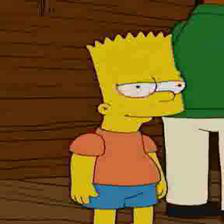

In [ ]:
# Check the dataset was correctly uploaded to Hub
ds_simpsons_family_resized_hub = hub.load(hub_simpsons_resized_dataset_path)
print(characters_classes_family[ds_simpsons_family_resized_hub.labels[0].numpy()[0]])
Image.fromarray(ds_simpsons_family_resized_hub.images[0].numpy())

In [ ]:
print(len(ds_simpsons_family_resized_hub))

6361


## Set up test set: './data/kaggle_simpson_testset/kaggle_simpson_testset'

In [ ]:
test_set_path = './data/kaggle_simpson_testset/kaggle_simpson_testset'
files_in_test_set = glob.glob(test_set_path + '/*.jpg')
print(f'There are {len(files_in_test_set)} testing files')

There are 990 testing files


In [ ]:
!ls ./data/kaggle_simpson_testset/kaggle_simpson_testset

abraham_grampa_simpson_0.jpg	 lenny_leonard_0.jpg
abraham_grampa_simpson_10.jpg	 lenny_leonard_10.jpg
abraham_grampa_simpson_11.jpg	 lenny_leonard_11.jpg
abraham_grampa_simpson_12.jpg	 lenny_leonard_12.jpg
abraham_grampa_simpson_13.jpg	 lenny_leonard_13.jpg
abraham_grampa_simpson_14.jpg	 lenny_leonard_14.jpg
abraham_grampa_simpson_15.jpg	 lenny_leonard_15.jpg
abraham_grampa_simpson_16.jpg	 lenny_leonard_16.jpg
abraham_grampa_simpson_17.jpg	 lenny_leonard_17.jpg
abraham_grampa_simpson_18.jpg	 lenny_leonard_18.jpg
abraham_grampa_simpson_19.jpg	 lenny_leonard_19.jpg
abraham_grampa_simpson_1.jpg	 lenny_leonard_1.jpg
abraham_grampa_simpson_20.jpg	 lenny_leonard_20.jpg
abraham_grampa_simpson_21.jpg	 lenny_leonard_21.jpg
abraham_grampa_simpson_22.jpg	 lenny_leonard_22.jpg
abraham_grampa_simpson_23.jpg	 lenny_leonard_23.jpg
abraham_grampa_simpson_24.jpg	 lenny_leonard_24.jpg
abraham_grampa_simpson_25.jpg	 lenny_leonard_25.jpg
abraham_grampa_simpson_26.jpg	 lenny_leonard_26.jpg
abraham_grampa_s

We need to put test images in subfolders corresponding at the classes of the images

In [ ]:
for file_path in tqdm(files_in_test_set):
  # remove the digit after the last '_' to get the new subfodler name = name of the character
  # [0:-1] to remove the last '_'
  # .split('/')[-1] to only keep the name and not the full path to the image
  name_subfolder = file_path.replace(file_path.split('_')[-1],'')[0:-1].split('/')[-1] 

  path_subfolder = os.path.join(test_set_path, name_subfolder)

  if not os.path.isdir(path_subfolder):
    # Creating subfolder if not already created in previous iterations
    os.mkdir(path_subfolder)

  # New path to the image in the subfolder
  path_image_in_subfolder = os.path.join(path_subfolder, file_path.split('/')[-1])
  os.system(f'mv {file_path} {path_image_in_subfolder}')

100%|██████████| 990/990 [00:39<00:00, 24.80it/s]


In [ ]:
!ls ./data/kaggle_simpson_testset/kaggle_simpson_testset

abraham_grampa_simpson	  homer_simpson     milhouse_van_houten
apu_nahasapeemapetilon	  kent_brockman     moe_szyslak
bart_simpson		  krusty_the_clown  ned_flanders
charles_montgomery_burns  lenny_leonard     nelson_muntz
chief_wiggum		  lisa_simpson	    principal_skinner
comic_book_guy		  marge_simpson     sideshow_bob
edna_krabappel		  mayor_quimby


We only keep the members of the Simpsons family (like before)

In [ ]:
# Creates a generator 
test_subfolders_dataset_gen = glob.iglob(test_set_path + "/**")

for subfolder in test_subfolders_dataset_gen:
  # append the name of the character and remove the root path: path_dataset
  if 'lisa' in subfolder or 'homer' in subfolder or 'maggie' in subfolder or 'marge' in subfolder or 'bart' in subfolder:
    print(f'Keeping this subfolder: {subfolder}')
  else:
    os.system(f'rm -r {subfolder}')
    print(f'Deleted subfolder {subfolder}')

Deleted subfolder ./data/kaggle_simpson_testset/kaggle_simpson_testset/lenny_leonard
Keeping this subfolder: ./data/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson
Deleted subfolder ./data/kaggle_simpson_testset/kaggle_simpson_testset/milhouse_van_houten
Keeping this subfolder: ./data/kaggle_simpson_testset/kaggle_simpson_testset/marge_simpson
Deleted subfolder ./data/kaggle_simpson_testset/kaggle_simpson_testset/ned_flanders
Deleted subfolder ./data/kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy
Deleted subfolder ./data/kaggle_simpson_testset/kaggle_simpson_testset/apu_nahasapeemapetilon
Deleted subfolder ./data/kaggle_simpson_testset/kaggle_simpson_testset/kent_brockman
Deleted subfolder ./data/kaggle_simpson_testset/kaggle_simpson_testset/edna_krabappel
Deleted subfolder ./data/kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown
Keeping this subfolder: ./data/kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson
Deleted subfolder ./data/kagg

In [ ]:
!ls ./data/kaggle_simpson_testset/kaggle_simpson_testset

bart_simpson  homer_simpson  lisa_simpson  marge_simpson


In [ ]:
# Create a folder for Maggie's class
os.mkdir('./data/kaggle_simpson_testset/kaggle_simpson_testset/maggie_simpson')

In [ ]:
!ls ./data/kaggle_simpson_testset/kaggle_simpson_testset

bart_simpson  homer_simpson  lisa_simpson  maggie_simpson  marge_simpson


In [ ]:
local_simpsons_test_dataset_path = './the-family-simpsons-characters-test-set'
# Create simpsons family test dataset -- not resized yet
ds_simpsons_family_test, characters_classes_family_test = send_dataset_to_Hub(test_set_path, local_simpsons_test_dataset_path)

The classes in this dataset are: ['bart_simpson', 'marge_simpson', 'homer_simpson', 'maggie_simpson', 'lisa_simpson']


100%|██████████| 200/200 [00:00<00:00, 469.74it/s]


In [ ]:
# Path of the resized Simpsons family dataset in Hub
hub_simpsons_resized_test_dataset_path = 'hub://margauxmforsythe/the-family-simpsons-characters-test-set-resized-224x224'

#We use the overwrite=True to make this code re-runnable
ds_simpsons_family_test_resized = hub.like(hub_simpsons_resized_test_dataset_path, ds_simpsons_family_test, overwrite = True)

# Resize and send to Hub
resize(new_size=(224, 224)).eval(ds_simpsons_family_test, ds_simpsons_family_test_resized, num_workers = 2)

bart_simpson


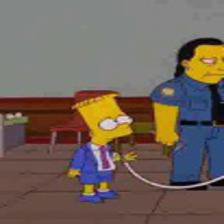

In [ ]:
ds_simpsons_family_test_resized_hub = hub.load(hub_simpsons_resized_test_dataset_path)
print(characters_classes_family_test[ds_simpsons_family_test_resized_hub.labels[0].numpy()[0]])
Image.fromarray(ds_simpsons_family_test_resized_hub.images[0].numpy())

In [ ]:
print(len(ds_simpsons_family_test_resized_hub))

200


## Training in other [notebook](https://colab.research.google.com/drive/1WSxxUnRQBapIAzHW9ug5msbmO7xrH_L4?usp=sharing) ran on GPU